In [7]:
import importlib
# import matplotlib
import os
import pickle
import photogrammetry as pg

%matplotlib qt

In [8]:
importlib.reload(pg)

<module 'photogrammetry' from '/home/evanmayer/github/hotspot/verification/photogrammetry.py'>

In [9]:
# check for pickled camera matrices to avoid expensive recalibration
if not (
    os.path.exists('camera_cal_mtx.pickle') and
    os.path.exists('camera_cal_dist.pickle') and
    os.path.exists('camera_cal_optimal_camera_matrix.pickle')
):
    # calibrate the camera for distortion
    mtx, dist, optimal_camera_matrix, roi = pg.calibrate_camera(
        os.path.join('input', 'camera_cal'),
        plot=False
    )
    with open('camera_cal_mtx.pickle', 'wb') as f:
        pickle.dump(mtx, f, protocol=pickle.HIGHEST_PROTOCOL)
    with open('camera_cal_dist.pickle', 'wb') as f:
        pickle.dump(dist, f, protocol=pickle.HIGHEST_PROTOCOL)
    with open('camera_cal_optimal_camera_matrix.pickle', 'wb') as f:
        pickle.dump(optimal_camera_matrix, f, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open('camera_cal_mtx.pickle', 'rb') as f:
        mtx = pickle.load(f)
    with open('camera_cal_dist.pickle', 'rb') as f:
        dist = pickle.load(f)
    with open('camera_cal_optimal_camera_matrix.pickle', 'rb') as f:
        optimal_camera_matrix = pickle.load(f)

In [10]:
image_data = pg.find_targets(
    os.path.join('input', 'meas', 'try1'),
    os.path.join('input', 'targets'),
    mtx,
    dist,
    optimal_camera_matrix,
    plot=False
)

INFO:photogrammetry:Corner detection after de-distortion in input/meas/try1/IMG_7521.JPG: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/try1/IMG_7524.JPG: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/try1/IMG_7526.JPG: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/try1/IMG_7522.JPG: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/try1/IMG_7523.JPG: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/try1/IMG_7527.JPG: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/try1/IMG_7525.JPG: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/try1/IMG_7528.JPG: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/try1/IMG_7529.JPG: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/try1/IMG_7530.JPG: True
INFO:photogrammetry:Corner detection after de-dist

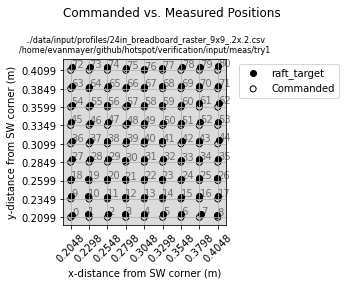

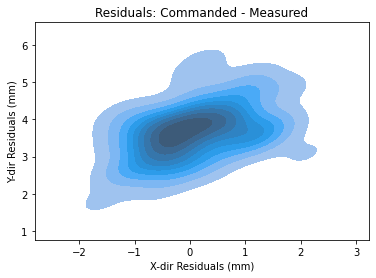

In [6]:
command_file = os.path.join('..', 'data', 'input', 'profiles', '24in_breadboard_raster_9x9_.2x.2.csv')
pg.post_process_many_to_many(image_data, command_file)